<a href="https://colab.research.google.com/github/venkythota05/PRODIGY_ML_2/blob/main/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
def move_images_to_subfolder(directory, class_name="food"):
    """ Moves all images in the given directory into a single class subfolder. """
    new_folder = os.path.join(directory, class_name)
    os.makedirs(new_folder, exist_ok=True)
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        if os.path.isfile(file_path):
            os.rename(file_path, os.path.join(new_folder, file))
    print(f"Images moved to '{new_folder}'")

In [3]:
train_dir = "/content/drive/MyDrive/foods/train"
val_dir = "/content/drive/MyDrive/foods/validation"
move_images_to_subfolder(train_dir)
move_images_to_subfolder(val_dir)

Images moved to '/content/drive/MyDrive/foods/train/food'
Images moved to '/content/drive/MyDrive/foods/validation/food'


In [4]:
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 17 images belonging to 1 classes.
Found 8 images belonging to 1 classes.


In [5]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
epochs = 10
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.9412 - loss: 0.6691 - val_accuracy: 1.0000 - val_loss: 1.4770e-16
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 1.7828e-16 - val_accuracy: 1.0000 - val_loss: 9.5913e-32
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 2.8627e-31 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - 

In [8]:
# Save the Model
model.save("food_recognition_model.h5")

In [12]:
from sklearn.metrics import classification_report, accuracy_score

val_generator.reset()
y_true = val_generator.classes
y_pred = model.predict(val_generator)
y_pred = (y_pred > 0.5).astype(int).flatten()
accuracy = accuracy_score(y_true, y_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['food']))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Validation Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

        food       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [9]:
def display_last_images(generator, model):
    batch = next(generator)
    images, labels = batch
    predictions = model.predict(images)

    plt.figure(figsize=(10, 5))
    for i in range(min(5, len(images))):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i])
        pred_label = "tiffin" if predictions[i] > 0.5 else "food"
        actual_label = "tiffin" if labels[i] > 0.5 else "food"
        plt.title(f"Pred: {pred_label}\nActual: {actual_label}")
        plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


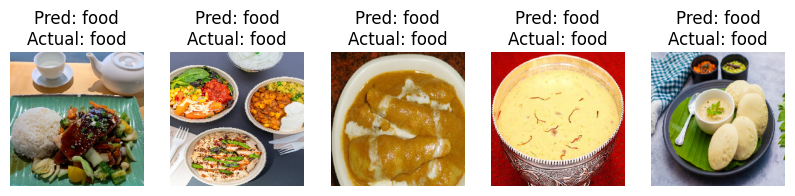

In [11]:
display_last_images(train_generator, model)